In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/gdrive/MyDrive/Bootcamp Data Bangalore/Dataset/credit_scoring_bank_cimb.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   kode_kontrak             900 non-null    object
 1   pendapatan_setahun_juta  900 non-null    int64 
 2   kpr_aktif                900 non-null    object
 3   durasi_pinjaman_bulan    900 non-null    int64 
 4   jumlah_tanggungan        900 non-null    int64 
 5   rata_rata_overdue        900 non-null    object
 6   risk_rating              900 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 49.3+ KB


In [ ]:
df.describe()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
count,900.000000,900.000000,900.000000,900.000000
mean,163.318889,29.933333,2.932222,2.681111
std,51.863210,13.671988,2.007457,1.294928
min,70.000000,12.000000,0.000000,1.000000
25%,121.000000,12.000000,1.000000,1.000000
50%,162.000000,24.000000,3.000000,3.000000
75%,199.000000,48.000000,5.000000,3.000000
max,300.000000,48.000000,6.000000,5.000000


In [ ]:
df.isnull().any()

kode_kontrak               False
pendapatan_setahun_juta    False
kpr_aktif                  False
durasi_pinjaman_bulan      False
jumlah_tanggungan          False
rata_rata_overdue          False
risk_rating                False
dtype: bool

In [ ]:
df.isnull().sum()

kode_kontrak               0
pendapatan_setahun_juta    0
kpr_aktif                  0
durasi_pinjaman_bulan      0
jumlah_tanggungan          0
rata_rata_overdue          0
risk_rating                0
dtype: int64

# **EDA**

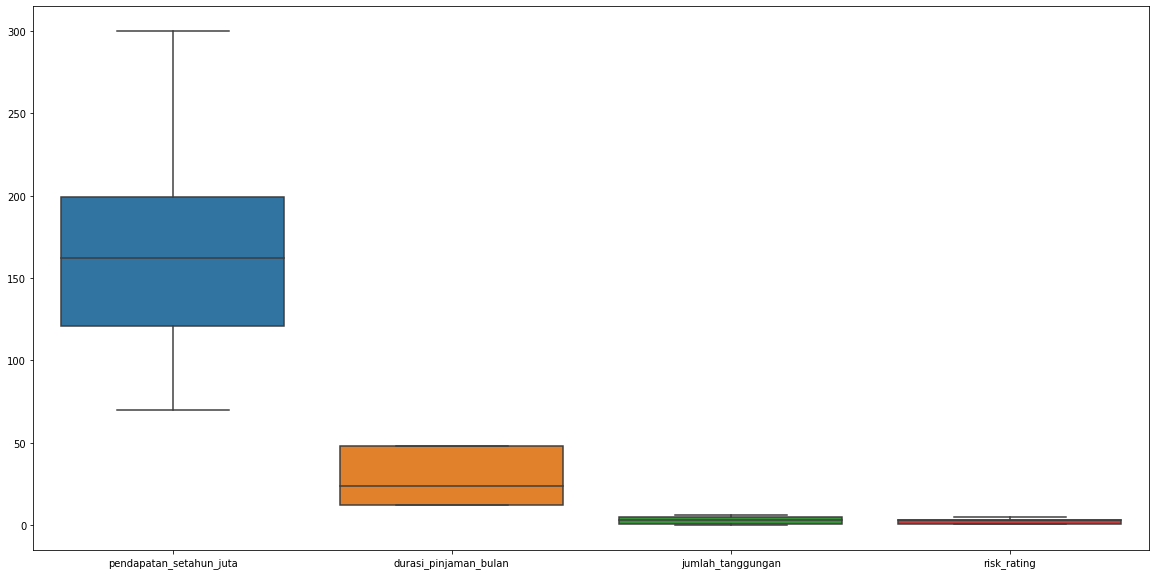

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.boxplot(data=df)

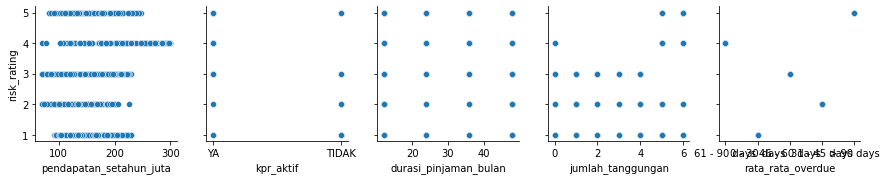

In [ ]:
sns.pairplot(data = df, x_vars=['pendapatan_setahun_juta','kpr_aktif','durasi_pinjaman_bulan','jumlah_tanggungan','rata_rata_overdue'],y_vars=['risk_rating'])

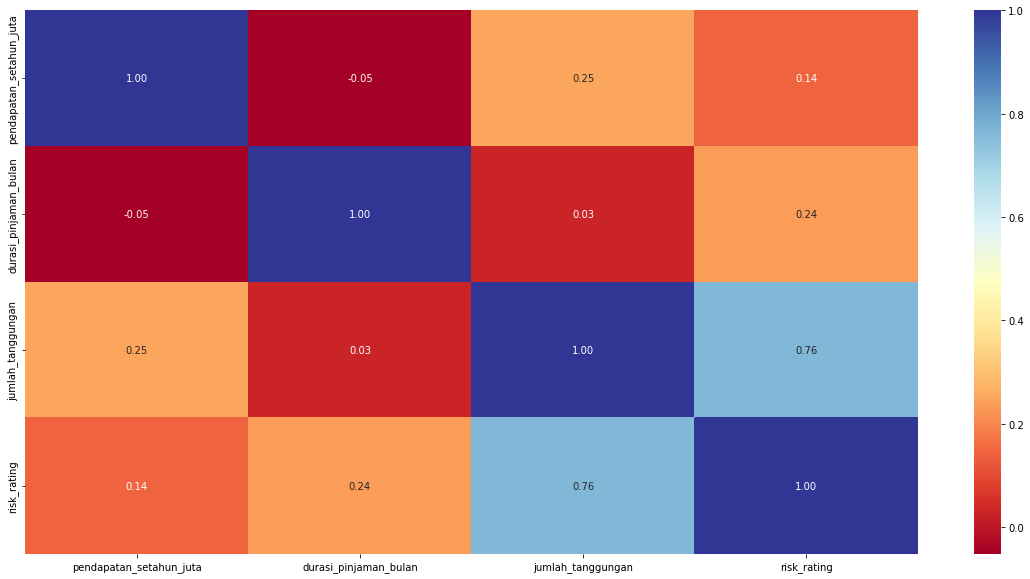

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
corr = df.corr()                                #corr=korelasi
sns.heatmap(corr,annot=True,fmt='.2f', cmap = "RdYlBu", ax=ax)

In [ ]:
a = pd.get_dummies(df['kpr_aktif'],prefix = 'kpr')
df1 = df.join(a)
df1['overdue_label'] = df1['rata_rata_overdue'].astype('category').cat.codes

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(['kpr_aktif','rata_rata_overdue','kode_kontrak','risk_rating'],axis=1)
Y = df1['risk_rating']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size= 0.2)

## **Linear regression**

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#fit model to train data
regressor.fit(Xtrain,Ytrain)
regressor.score(Xtest,Ytest)

1.0

## **Ridge regression**

In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge
regressor2 = Ridge(alpha= 0.5)
#fit model to train data
regressor2.fit(Xtrain,Ytrain)
regressor2.score(Xtest,Ytest)

0.9999992952748887

## **Lasso regression**

In [ ]:
#lasso regression
from sklearn.linear_model import Lasso
regressor3 = Ridge(alpha= 0.5)
#fit model to train data
regressor3.fit(Xtrain,Ytrain)
regressor3.score(Xtest,Ytest)

0.9999992952748887

## **ElasticNet regression**

In [ ]:
#lasso regression
from sklearn.linear_model import ElasticNet
regressor4 = ElasticNet(alpha=3)
#fit model to train data
regressor4.fit(Xtrain,Ytrain)
regressor4.score(Xtest,Ytest)


0.22326321017465545

## **Logistic regression**

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
regressor5 = LogisticRegression()
#fit model to train data
regressor5.fit(Xtrain,Ytrain)
regressor5.score(Xtest,Ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8555555555555555

# **Predict & Evaluation**

## **Linear regression**

In [ ]:
pred  = regressor.predict(Xtest)

In [ ]:
#evaluation model linear
from sklearn.metrics import mean_squared_error
print('MSE : %.2f' %mean_squared_error(Ytest,pred))

MSE : 0.21


## **Ridge regression**

In [ ]:
pred2  = regressor2.predict(Xtest)

In [ ]:
#evaluation model linear
from sklearn.metrics import mean_squared_error
print('MSE : %.2f' %mean_squared_error(Ytest,pred2))

MSE : 0.00


## **Lasso regression**

In [ ]:
pred3  = regressor3.predict(Xtest)

In [ ]:
#evaluation model linear
from sklearn.metrics import mean_squared_error
print('MSE : %.2f' %mean_squared_error(Ytest,pred3))

MSE : 0.00


## **ElasticNet regression**

In [ ]:
pred4  = regressor4.predict(Xtest)

In [ ]:
#evaluation model linear
from sklearn.metrics import mean_squared_error
print('MSE : %.2f' %mean_squared_error(Ytest,pred4))

MSE : 1.34


## **Logistic regression**

In [ ]:
pred5  = regressor5.predict(Xtest)

In [ ]:
#evaluation model linear
from sklearn.metrics import mean_squared_error
print('MSE : %.2f' %mean_squared_error(Ytest,pred5))

MSE : 0.21


# **PCA**

In [ ]:
predictor = ['pendapatan_setahun_juta','kpr_TIDAK','kpr_YA','durasi_pinjaman_bulan','jumlah_tanggungan','overdue_label']
x = df1[predictor].values
y = df1['risk_rating']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)

In [ ]:
df2 = pd.DataFrame(data=x_std, columns=predictor)
df2.head()

,pendapatan_setahun_juta,kpr_TIDAK,kpr_YA,durasi_pinjaman_bulan,jumlah_tanggungan,overdue_label
0,2.540420,-0.868554,0.868554,1.322171,1.030621,1.019070
1,2.077407,-0.868554,0.868554,0.443976,1.030621,1.019070
2,-0.083321,1.151339,-1.151339,-1.312414,-1.461477,-1.298949
3,0.900582,-0.868554,0.868554,-1.312414,0.033782,0.246397
4,0.032432,1.151339,-1.151339,0.443976,-1.461477,-0.526276


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4).fit_transform(x_std)
pdf = pd.DataFrame(data=pca,columns=['pc1','pc2','pc3','pc4'])
pdf['risk_rating'] = y
pdf.describe()

,pc1,pc2,pc3,pc4,risk_rating
count,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,900.000000
mean,1.036208e-17,-6.537980e-18,2.800229e-17,-1.103130e-16,2.681111
std,1.860202e+00,1.047820e+00,9.329683e-01,6.541658e-01,1.294928
min,-2.796346e+00,-2.621271e+00,-2.363783e+00,-1.815364e+00,1.000000
25%,-1.483122e+00,-6.762233e-01,-6.701585e-01,-4.265082e-01,1.000000
50%,-8.193420e-01,3.474447e-02,6.535595e-03,-5.440553e-02,3.000000
75%,2.034713e+00,7.397857e-01,5.870445e-01,3.557636e-01,3.000000
max,2.805577e+00,2.709460e+00,2.421818e+00,2.902558e+00,5.000000


In [ ]:
q = pdf.drop(['risk_rating'], axis = 1)
w = pdf['risk_rating']
qtrain, qtest, wtrain, wtest = train_test_split(q,w, test_size = 0.3)

In [ ]:
reg = LinearRegression()
reg.fit(qtrain, wtrain)
reg.score(qtest, wtest)

0.8807710700152602

In [ ]:
pred6 = reg.predict(qtest)

In [ ]:
print('MSE Setelah PCA : %.2f' %mean_squared_error(wtest,pred6))

MSE Setelah PCA : 0.17


# **Kesimpulan**

Dari hasil analisis regression dan PCA, dapat kita lihat bahwa lebih baik menggunakan Ridge Regression dan Lasso Regression dibandingkan PCA.